# Predicting Heart disease using Machine Learning

## The aim of this project is to develop a Machine Learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

### Understanding Features
1. age: displays the age of the individual.

2. sex: displays the gender of the individual using the following format :

    • 1 = male

    • 0 = female

3. cp (Chest-Pain Type): displays the type of chest-pain experienced by the individual using the following format :

    • 0 = typical angina

    • 1 = atypical angina

    • 2= non — anginal pain

    • 3 = asymptotic

4. trestbps(Resting Blood Pressure): displays the resting blood pressure value of an individual in mmHg (unit)

5. chol(Serum Cholestrol): displays the serum cholesterol in mg/dl (unit)

6. fbs (Fasting Blood Sugar): compares an individual's fasting blood sugar value with 120mg/dl.

    • If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false)

7. restecg (Resting ECG): displays resting electrocardiographic results • 0 = normal

    • 1 = having ST-T wave abnormality

    • 2 = left ventricular hyperthrophy

8. thalach(Max Heart Rate Achieved): displays the max heart rate achieved by an individual.

9. exang (Exercise induced angina):

    • 1 = yes

    • 0 = no

10. oldpeak (ST depression induced by exercise relative to rest): displays the value of an integer or float.

11. slope (Peak exercise ST segment) :

    • 0 = upsloping

    • 1 = flat

    • 2 = downsloping

12. ca (Number of major vessels (0–3) colored by fluoroscopy): displays the value as integer or float.

13. thal: displays the thalassemia (is an inherited blood disorder that causes your body to have less hemoglobin than normal) :

    • 0 = normal

    • 1 = fixed defect

    • 2 = reversible defect

14. target (Diagnosis of heart disease): Displays whether the individual is suffering from heart disease or not :

    • 0 = absence

    • 1 = present

In [ ]:
## importing libraries

import pandas as pd
import numpy as np
import datetime as dt
from tqdm.notebook import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
import warnings
from imblearn.under_sampling import RandomUnderSampler
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve,plot_roc_curve


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
#import data using pandas and read file
df = pd.read_csv('/content/gdrive/MyDrive/heart_cleveland_upload.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
df.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','slope':'ST_slope','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_disease'}, inplace = True)

In [ ]:
df.tail()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [ ]:
df.dtypes

Age                          int64
Sex                          int64
Chest_pain                   int64
Resting_blood_pressure       int64
Cholesterol                  int64
Fasting_blood_sugar          int64
ECG_results                  int64
Maximum_heart_rate           int64
Exercise_induced_angina      int64
ST_depression              float64
ST_slope                     int64
Major_vessels                int64
Thalassemia_types            int64
condition                    int64
dtype: object

In [ ]:
df.describe()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [ ]:
df.shape

(297, 14)

## Data Cleaning & Analysis

In [ ]:
## Checking for missing values
df.isnull().sum()

Age                        0
Sex                        0
Chest_pain                 0
Resting_blood_pressure     0
Cholesterol                0
Fasting_blood_sugar        0
ECG_results                0
Maximum_heart_rate         0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Major_vessels              0
Thalassemia_types          0
condition                  0
dtype: int64

#### Our data does not contain any missing values

In [ ]:
##Checking for duplicates
df.duplicated().any()

False

#### The data also doesn't have any duplicates

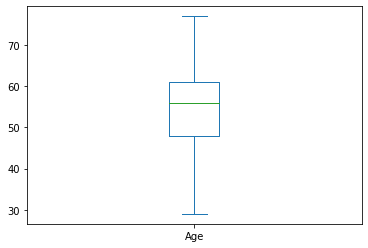

In [ ]:
## Checking for outliers in age
df.Age.plot.box()

#### There seems to be no outliers in age

In [ ]:
## Checking the age descriptive stats
df.Age.describe()

count    297.000000
mean      54.542088
std        9.049736
min       29.000000
25%       48.000000
50%       56.000000
75%       61.000000
max       77.000000
Name: Age, dtype: float64

## Exploratory Data Analysis

In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest_pain', 'Resting_blood_pressure', 'Cholesterol',
       'Fasting_blood_sugar', 'ECG_results', 'Maximum_heart_rate',
       'Exercise_induced_angina', 'ST_depression', 'ST_slope', 'Major_vessels',
       'Thalassemia_types', 'condition'],
      dtype='object')

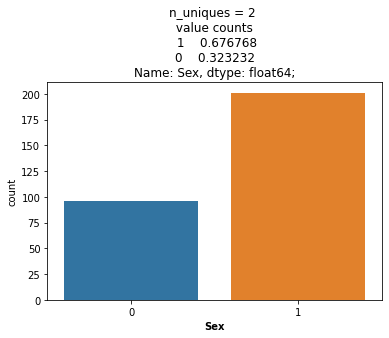

In [ ]:
#CountPlot for sex

# Count Values to display on the chart
norm_count = df['Sex'].value_counts(normalize = True)
n_uni = df['Sex'].nunique()

#Display Chart

sns.countplot(x = df['Sex']);
#Display Labels
plt.xlabel('Sex',fontweight='bold')
plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count));

#### From the above countplot, we can see that males are more, 68% while the females are about 32%

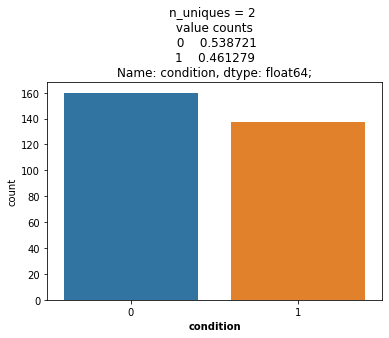

In [ ]:
#CountPlot for Condition

# Count Values to display on the chart
norm_count = df['condition'].value_counts(normalize = True)
n_uni = df['condition'].nunique()

#Display Chart

sns.countplot(x = df['condition']);
#Display Labels
plt.xlabel('condition',fontweight='bold')
plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count));

#### The above countplot shows that people without heart disease are 54% while those with the heart disease are about 46%.

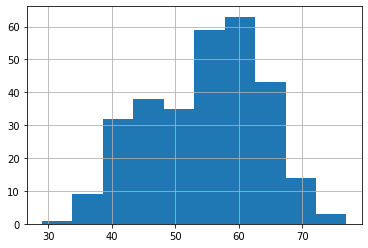

In [ ]:
df.Age.hist();

#### The distribution for the age column appears to be left skewed 

In [ ]:
!pip install pandas-profiling==3.4.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.3/315.3 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 57.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 31.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=fa860e7b29356c684c3bf796cc6abb34b2499dd1940066cd5def33ca0e0e8391
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
   

In [ ]:
import pandas_profiling as pp

In [ ]:
profile = pp.ProfileReport(df, title = 'Heart Disease Prediction' ,explorative=True)

In [ ]:
profile

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def clean_data(df):
  # Remove any unnecessary characters or whitespace from the data
  cleaned_data = df.strip()

  # Split the data into individual entries
  data_entries = cleaned_data.split(',')

  # Convert the entries to the appropriate data type
  cleaned_entries = []
  for entry in data_entries:
    cleaned_entries.append(int(entry))

  return cleaned_entries

Correlation matrix & Matrix Visualisation

In [ ]:
df.corr()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,condition
Age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.120795,0.227075
Sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.370556,0.278467
Chest_pain,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.266275,0.408945
Resting_blood_pressure,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.130612,0.153490
Cholesterol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.023441,0.080285
Fasting_blood_sugar,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.051038,0.003167
ECG_results,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.013612,0.166343
Maximum_heart_rate,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.258386,-0.423817
Exercise_induced_angina,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.323268,0.421355
ST_depression,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.336809,0.424052


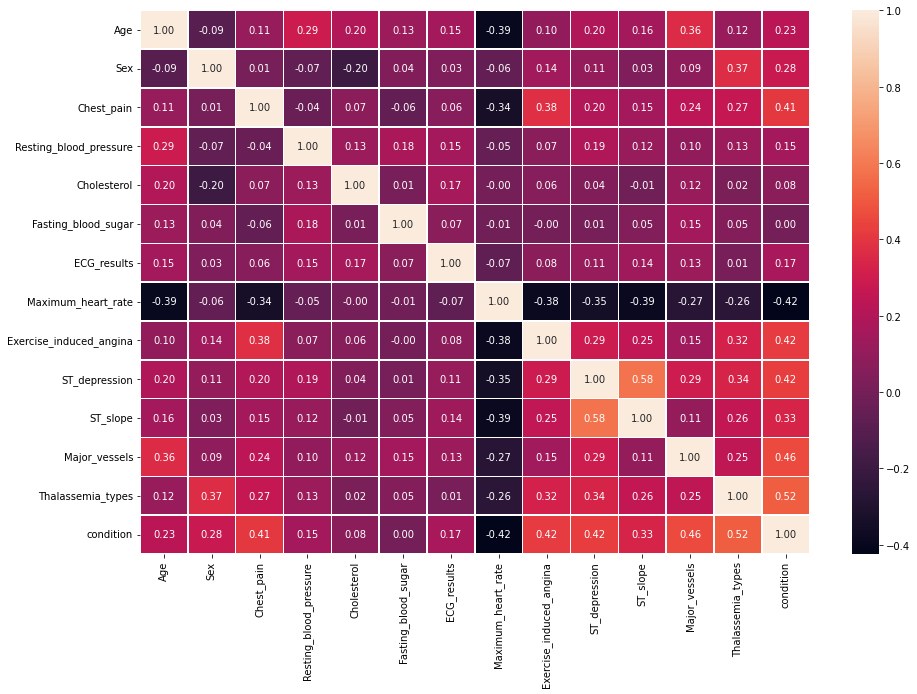

In [ ]:
# Let's make our correlation matrix visual
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

### Exploratory Data Analysis

In [ ]:
# Let's find out how many of each class are
# Target variable (Heart Disease-- 0 (absence) , 1 (present))

df['condition'].value_counts()

0    160
1    137
Name: condition, dtype: int64

In [ ]:
#Representation of Target variable in Percentage

countNoDisease = len(df[df.condition == 0])
countHaveDisease = len(df[df.condition == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.condition))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.condition))*100)))

Percentage of Patients Haven't Heart Disease: 53.87%
Percentage of Patients Have Heart Disease: 46.13%


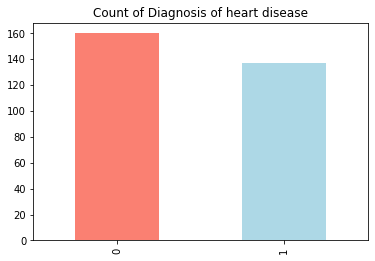

In [ ]:
#Understanding the balancing of the data

df['condition'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of Diagnosis of heart disease");

Heart Disease Frequency vs Sex

In [ ]:
# Male and Female

df['Sex'].value_counts()

1    201
0     96
Name: Sex, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

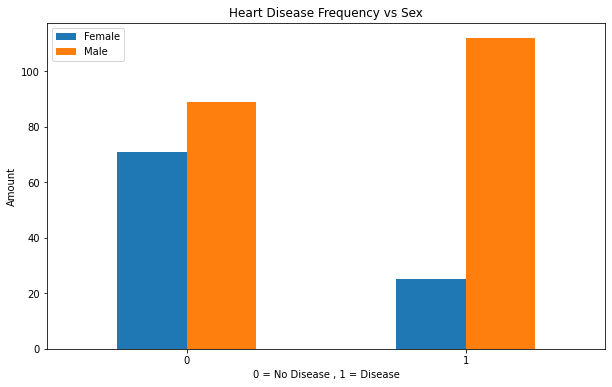

In [ ]:
#Create a plot for crosstab

pd.crosstab(df['condition'],df['Sex']).plot(kind="bar",figsize=(10,6));
plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

Text(1.0, 1.0, 'Relation Between resting electrocardiogram rate and thal(haemoglobin defective types) with respect to gender')

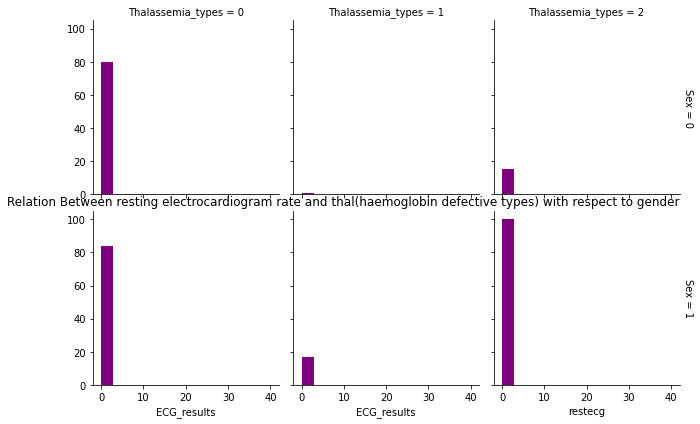

In [ ]:
#Plot on Relation Between resting electrocardiogram rate and thal(haemoglobin defective types) with respect to gender
grid = sns.FacetGrid(df, row="Sex", col="Thalassemia_types", margin_titles=True)
grid.map(plt.hist, "ECG_results", bins=np.linspace(0, 40, 15),color = "Purple");
plt.xlabel('restecg')
plt.ylabel('thal(haemoglobin defective) types')
plt.title(label="Relation Between resting electrocardiogram rate and thal(haemoglobin defective types) with respect to gender",loc ='right')

Interpretation
The histogram plots of the resting ectrocardiogram rate and heamoglobin lowering defect with respect to gender shows that both the gender have same restecg , but the haemoglobin lowering defect type 2 is greater in males whereas the haemoglobin lowering reverse effect type 3 is greater in males and lesser in females , therefore it is tough for females to get back the haemoglobin content if there is a loss on the other hand it is easier for men to get back there haemoglobin content

### Age vs. Max. Heart Rate for Heart Disease

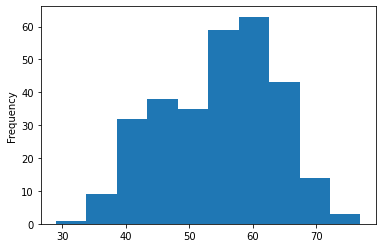

In [ ]:
#Check the distribution of the age column with a histogram

df['Age'].plot(kind='hist');

#### From the histogram above, it shows that age is skewed to the left.

In [ ]:
df['Maximum_heart_rate'].value_counts()

#Here Length denotes how many different types of categories are there

162    11
163     9
160     9
152     8
172     7
       ..
192     1
202     1
167     1
97      1
195     1
Name: Maximum_heart_rate, Length: 91, dtype: int64

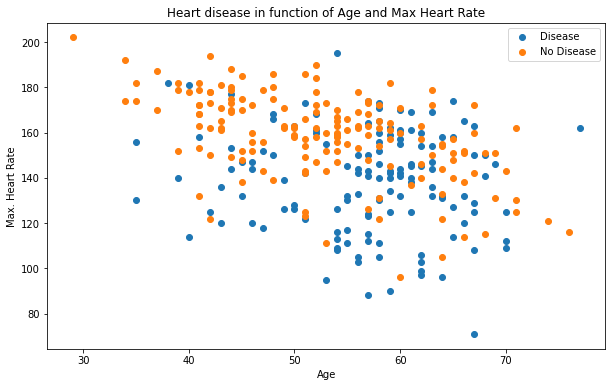

In [ ]:
plt.figure(figsize=(10,6))

#Target is equal to 1
plt.scatter(x = df[df['condition']==1]['Age'], y = df.Maximum_heart_rate[df.condition==1])

#Target is equal to 0
plt.scatter(x = df[df['condition']==0]['Age'], y = df.Maximum_heart_rate[df.condition==0],);

#Adding some helpful information
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max. Heart Rate")
plt.legend(["Disease","No Disease"])

Interpretation:
The above plot shows maximum heart rate of population with and without disease with respect to age

### Heart Disease Frequency per Chest Pain Type

In [ ]:
# Relation of Heart Disease with Chest Pain Type

pd.crosstab(df['Chest_pain'],df['condition'])

condition,0,1
Chest_pain,,
0,16,7
1,40,9
2,65,18
3,39,103


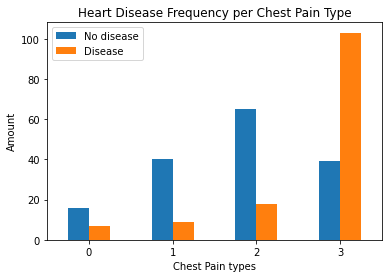

In [ ]:
# Make the crosstab more visual

pd.crosstab(df['Chest_pain'],df['condition']).plot(kind='bar')
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain types")
plt.ylabel("Amount")
plt.legend(['No disease','Disease'])
plt.xticks(rotation=0);


### Resting Blood Pressure

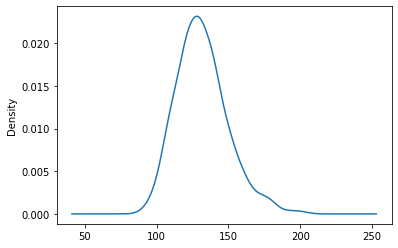

In [ ]:
df['Resting_blood_pressure'].plot(kind='kde')

Interpretation:
The above plot shows the density of Resting blood pressure and the maximum density is around 120-140

### Heart Disease vs Fasting Blood Sugar

In [ ]:
df['Fasting_blood_sugar'].value_counts()

0    254
1     43
Name: Fasting_blood_sugar, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

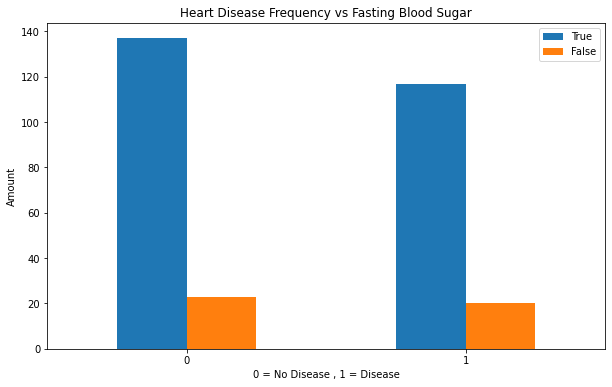

In [ ]:
#Create a plot for crosstab

pd.crosstab(df['condition'],df['Fasting_blood_sugar']).plot(kind="bar",figsize=(10,6));
plt.title("Heart Disease Frequency vs Fasting Blood Sugar")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["True","False"])
plt.xticks(rotation=0)


### Heart Disease vs Thalassemia types

In [ ]:
df['Thalassemia_types'].value_counts()

0    164
2    115
1     18
Name: Thalassemia_types, dtype: int64

In [ ]:
#Compare Target column i.e. Heart Disease with Thalassemia

pd.crosstab(df['condition'],df['Thalassemia_types'])

Thalassemia_types,0,1,2
condition,,,
0,127,6,27
1,37,12,88


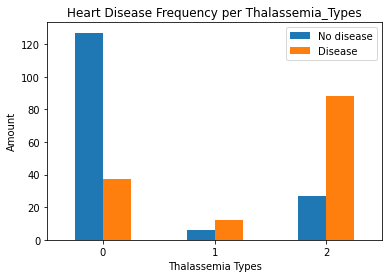

In [ ]:
# Make the crosstab more visual

pd.crosstab(df['Thalassemia_types'],df['condition']).plot(kind='bar')
plt.title("Heart Disease Frequency per Thalassemia_Types")
plt.xlabel("Thalassemia Types")
plt.ylabel("Amount")
plt.legend(['No disease','Disease'])
plt.xticks(rotation=0);


### Chest Pain type with respect to age and sex

Text(0.5, 1.0, 'Chest Pain type with respect to age and sex')

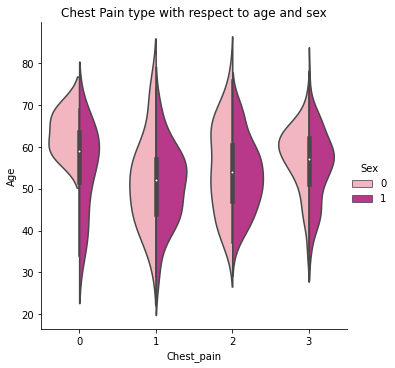

In [ ]:
sns.catplot(data=df, kind="violin", x="Chest_pain", y="Age",hue="Sex", split=True,palette="RdPu")
plt.title("Chest Pain type with respect to age and sex")

Interpretation:
The above plot shows the chest pain type with respect to age and sex and chest pain type 3 is greater for men which shows that they are more prone to heart disease

### Modelling

In [ ]:
df.head()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


### Split data using Train-Test Split

In [ ]:
X=df.drop('condition',axis=1)
y=df['condition']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### 1. Logistic Regression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#Training score

lr.score(X_train,y_train)

0.8734177215189873

In [ ]:
#Prediction of the test variable

lr_y_preds=lr.predict(X_test)


In [ ]:
#Testing accuracy

lr.score(X_test,y_test)

0.7333333333333333

### Confusion Matrix

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

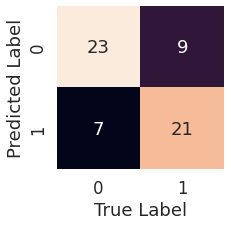

In [ ]:
plot_conf_mat(y_test,lr_y_preds)

### Classification Report

In [ ]:
print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



### 2. K-Nearest Neighbour

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
#Training score

knn.score(X_train,y_train)

0.7763713080168776

In [ ]:
#Prediction of the test variable

knn_y_preds=knn.predict(X_test)

In [ ]:
#Testing accuracy

knn.score(X_test,y_test)

0.5666666666666667

### Confusion Matrix

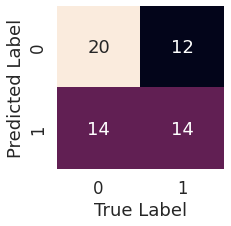

In [ ]:
plot_conf_mat(y_test,knn_y_preds)

### Classification Report

In [ ]:
print(classification_report(y_test,knn_y_preds))

              precision    recall  f1-score   support

           0       0.59      0.62      0.61        32
           1       0.54      0.50      0.52        28

    accuracy                           0.57        60
   macro avg       0.56      0.56      0.56        60
weighted avg       0.57      0.57      0.57        60



### 3. Random Forest

In [ ]:
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Training score

rf.score(X_train,y_train)


1.0

In [ ]:
#Prediction of the test variable

rf_y_preds=rf.predict(X_test)


In [ ]:
#Testing accuracy

rf.score(X_test,y_test)


0.75

### Confusion Matrix

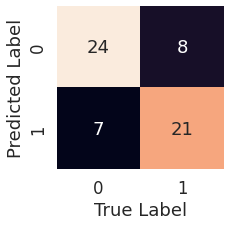

In [ ]:
plot_conf_mat(y_test,rf_y_preds)

### Classification Report

In [ ]:
print(classification_report(y_test,rf_y_preds))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        32
           1       0.72      0.75      0.74        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



### Different Model Scores (accuracy)

In [ ]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN':knn.score(X_test,y_test),
             'Random Forest':rf.score(X_test,y_test)}

In [ ]:
model_scores


{'Logistic Regression': 0.7333333333333333,
 'KNN': 0.5666666666666667,
 'Random Forest': 0.75}

### Model Comparison


In [ ]:
#Based on accuracy
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.733333,0.566667,0.75


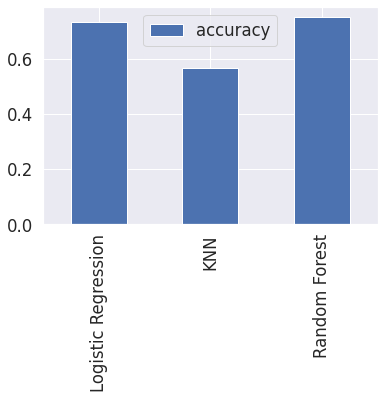

In [ ]:
model_compare.T.plot(kind='bar') # (T is here for transpose)